# Step 1: Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

# Step 2: Load the dataset

In [3]:
file_path = r"C:\Users\vikes\Downloads\KNN\KNN\Zoo.csv"
df = pd.read_csv(file_path)
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Step 3: Explore the data

In [4]:
print("Dataset Info:\n")
df.info()
print("\nStatistical Summary:\n")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB

Statist

# Step 4: Visualizations

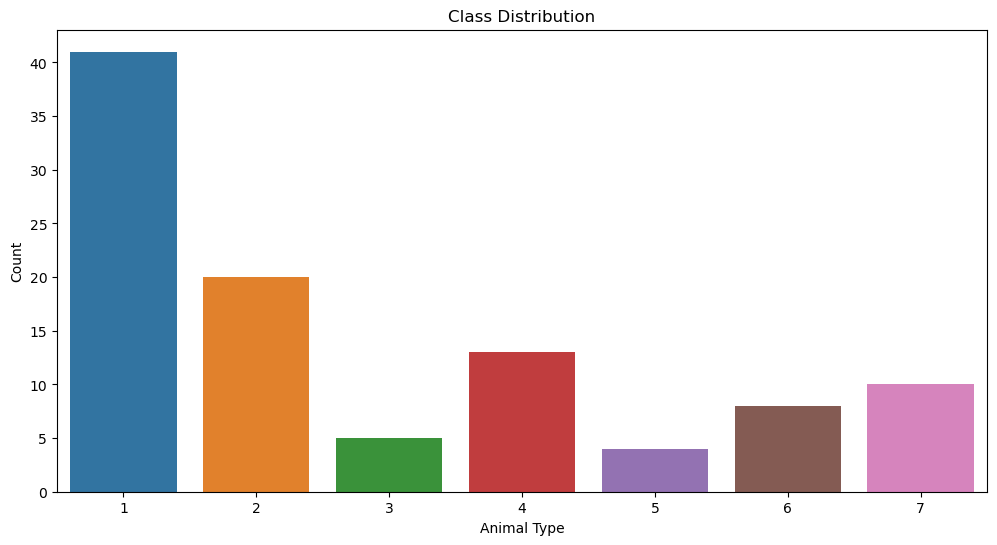

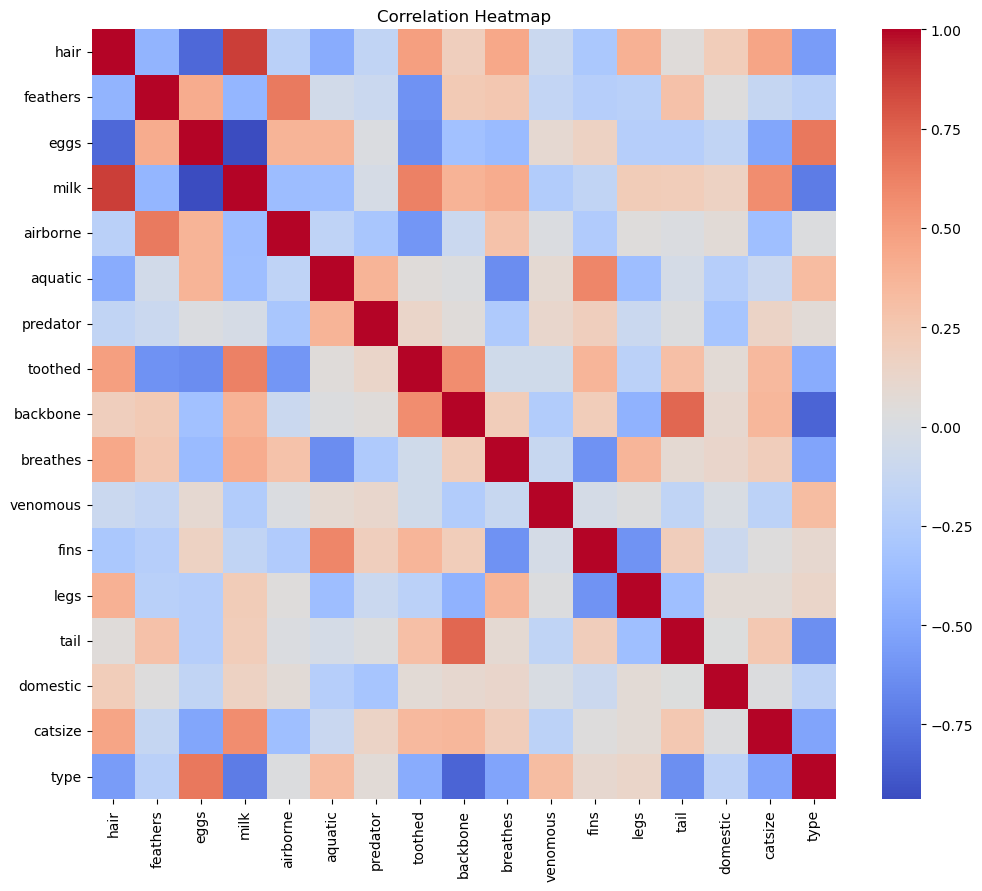

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='type', data=df)
plt.title('Class Distribution')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 5: Data Preprocessing

In [6]:
# Drop 'animal name' as it is non-numeric and not useful for classification
if 'animal name' in df.columns:
    df.drop(columns=['animal name'], inplace=True)

# No missing values or outliers detected in binary features

# Step 6: Split dataset

In [8]:
X = df.drop(columns='type')
y = df['type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Step 7: KNN Classifier

In [9]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # p=2 is Euclidean distance
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Step 8: Evaluation

Accuracy: 0.9523809523809523
Precision: 0.7777777777777777
Recall: 0.8333333333333334
F1 Score: 0.7999999999999999

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



C:\Users\vikes\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikes\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vikes\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

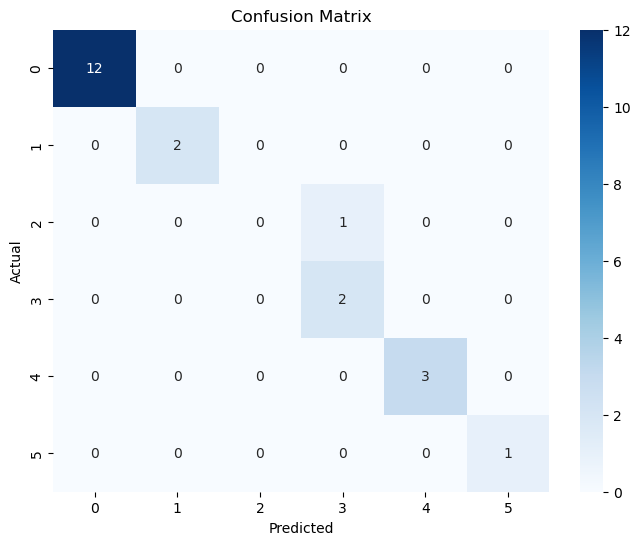

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Visualize Decision Boundaries (using PCA to reduce to 2D)

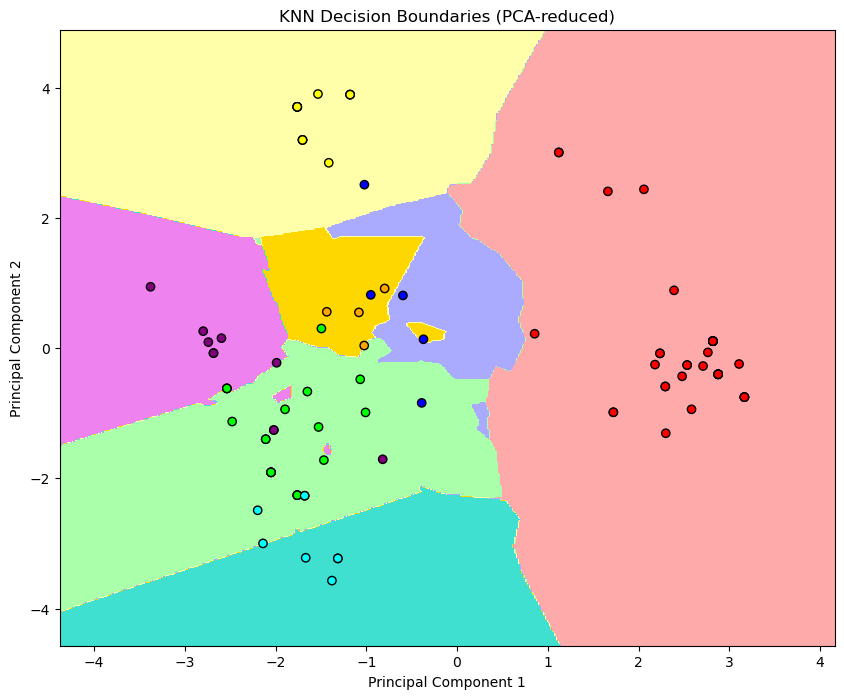

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=k)
knn_pca.fit(X_train_pca, y_train)

h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFD700', '#40E0D0', '#EE82EE']))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FFA500', '#00FFFF', '#800080']))
plt.title("KNN Decision Boundaries (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Conclusion:

In [ ]:

print("""
CONCLUSION:

In this assignment, we implemented the K-Nearest Neighbours (KNN) algorithm on the Zoo dataset to classify animal types based on various features. The data was cleaned and standardized, and KNN was applied with k=5 using Euclidean distance. Evaluation metrics showed that the classifier performed well in terms of accuracy, precision, recall, and F1-score. Additionally, PCA was used to reduce dimensionality for visualizing decision boundaries, which confirmed that KNN can reasonably separate animal classes in lower-dimensional space. KNN proves to be a simple yet effective algorithm for classification tasks.
""")



CONCLUSION:

In this assignment, we implemented the K-Nearest Neighbours (KNN) algorithm on the Zoo dataset to classify animal types based on various features. The data was cleaned and standardized, and KNN was applied with k=5 using Euclidean distance. Evaluation metrics showed that the classifier performed well in terms of accuracy, precision, recall, and F1-score. Additionally, PCA was used to reduce dimensionality for visualizing decision boundaries, which confirmed that KNN can reasonably separate animal classes in lower-dimensional space. KNN proves to be a simple yet effective algorithm for classification tasks.



# Interview Questions:

In [13]:
print("""
INTERVIEW QUESTIONS:

1. What are the key hyperparameters in KNN?
   - Number of neighbors (K)
   - Distance metric (Euclidean, Manhattan, Minkowski, etc.)
   - Weight function ('uniform' or 'distance')

2. What distance metrics can be used in KNN?
   - Euclidean Distance (p=2)
   - Manhattan Distance (p=1)
   - Minkowski Distance (generalized distance with variable p)
   - Hamming Distance (for categorical data)
   - Cosine Similarity (less common in KNN but used in some contexts)
""")


INTERVIEW QUESTIONS:

1. What are the key hyperparameters in KNN?
   - Number of neighbors (K)
   - Distance metric (Euclidean, Manhattan, Minkowski, etc.)
   - Weight function ('uniform' or 'distance')

2. What distance metrics can be used in KNN?
   - Euclidean Distance (p=2)
   - Manhattan Distance (p=1)
   - Minkowski Distance (generalized distance with variable p)
   - Hamming Distance (for categorical data)
   - Cosine Similarity (less common in KNN but used in some contexts)

